Puxar as libs

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

from io import StringIO
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Puxar a base

In [49]:
df = pd.read_csv('credit_score_classification.csv', low_memory=False)

Quantidade por target

In [50]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

Mostrar a tipagem das tabelas

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Resto das tabelas

In [52]:
df.loc[:, 'Outstanding_Debt':'Monthly_Balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Outstanding_Debt          100000 non-null  object 
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Credit_History_Age        90970 non-null   object 
 3   Payment_of_Min_Amount     100000 non-null  object 
 4   Total_EMI_per_month       100000 non-null  float64
 5   Amount_invested_monthly   95521 non-null   object 
 6   Payment_Behaviour         100000 non-null  object 
 7   Monthly_Balance           98800 non-null   object 
dtypes: float64(2), object(6)
memory usage: 6.1+ MB


Ajuste de data types com limpezas primárias

In [53]:
df['ID'] = df['ID'].astype('string')
df['Customer_ID'] = df['Customer_ID'].astype('string')
df['Month'] = df['Month'].astype('string')
df['Name'] = df['Name'].astype('string')
df['SSN'] = df['SSN'].astype('string')
df['Occupation'] = df['Occupation'].astype('string')
df['Type_of_Loan'] = df['Type_of_Loan'].astype('string')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype('string')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('string')
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].astype('float')

df['Age'] = df['Age'].str.replace('_', '').astype('int')
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype('float')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '').astype('int')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype('float')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype('float')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '').astype('float')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '').astype('float').fillna(0).astype('int')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '0').astype('float').fillna(0)
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'Não informado').astype('string')
df['Credit_History_Age'] = df['Credit_History_Age'].fillna('Não informado').astype('string')

df['Credit_Score'] = df['Credit_Score'].astype('category')

Verificação das estatísticas descritivas

In [54]:
df2 = df['Age'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(3)

Age
38    2.994
28    2.968
31    2.955
Name: proportion, dtype: float64

In [55]:
df2 = df['Month'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Month
January     12.5
February    12.5
March       12.5
April       12.5
May         12.5
June        12.5
July        12.5
August      12.5
Name: proportion, dtype: Float64

In [56]:
df2 = df['Age'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(3)

Age
38    2.994
28    2.968
31    2.955
Name: proportion, dtype: float64

In [57]:
df2 = df['Occupation'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Occupation
_______          7.062
Lawyer           6.575
Architect        6.355
Engineer          6.35
Scientist        6.299
Mechanic         6.291
Accountant       6.271
Developer        6.235
Media_Manager    6.232
Teacher          6.215
Name: proportion, dtype: Float64

In [58]:
df2 = df['Annual_Income'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Annual_Income
17273.83     0.016
17816.75     0.016
40341.16     0.016
9141.63      0.016
109945.32    0.016
36585.12     0.016
20867.67     0.016
22434.16     0.016
32543.38     0.016
33029.66     0.015
Name: proportion, dtype: float64

In [59]:
df2 = df['Monthly_Inhand_Salary'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Monthly_Inhand_Salary
6769.130000    0.017647
6082.187500    0.017647
6358.956667    0.017647
2295.058333    0.017647
3080.555000    0.016471
4387.272500    0.015294
5766.491667    0.015294
6639.560000    0.015294
536.431250     0.014118
1315.560833    0.012941
Name: proportion, dtype: float64

In [60]:
df2 = df['Num_Bank_Accounts'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Num_Bank_Accounts
6     13.001
7     12.823
8     12.765
4     12.186
5     12.118
3     11.950
9      5.443
10     5.247
1      4.490
0      4.328
Name: proportion, dtype: float64

In [61]:
df2 = df['Num_Credit_Card'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Num_Credit_Card
5     18.459
7     16.615
6     16.559
4     14.030
3     13.277
8      4.956
10     4.860
9      4.643
2      2.149
1      2.132
Name: proportion, dtype: float64

In [62]:
df2 = df['Interest_Rate'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Interest_Rate
8     5.012
5     4.979
6     4.721
12    4.540
10    4.540
9     4.494
7     4.494
11    4.428
18    4.102
15    3.992
Name: proportion, dtype: float64

In [63]:
df2 = df['Num_of_Loan'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Num_of_Loan
 3      15.104
 2      15.032
 4      14.743
 0      10.930
 1      10.606
 6       7.803
 7       7.344
 5       7.197
-100     3.876
 9       3.702
Name: proportion, dtype: float64

In [64]:
df2 = df['Type_of_Loan'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Type_of_Loan
Not Specified                      1.589308
Credit-Builder Loan                1.444826
Personal Loan                      1.435796
Debt Consolidation Loan            1.426765
Student Loan                       1.399675
Payday Loan                        1.354524
Mortgage Loan                      1.327434
Auto Loan                          1.300343
Home Equity Loan                   1.282283
Personal Loan, and Student Loan    0.361206
Name: proportion, dtype: Float64

In [65]:
df2 = df['Delay_from_due_date'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Delay_from_due_date
15    3.596
13    3.424
8     3.324
14    3.313
10    3.281
7     3.234
9     3.233
11    3.182
12    3.141
6     3.137
Name: proportion, dtype: float64

In [66]:
df2 = df['Num_of_Delayed_Payment'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Num_of_Delayed_Payment
0     8.611
19    5.481
17    5.412
16    5.312
10    5.309
15    5.237
18    5.216
20    5.089
12    5.059
9     4.981
Name: proportion, dtype: float64

In [67]:
df2 = df['Changed_Credit_Limit'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Changed_Credit_Limit
0.00     2.095
8.22     0.133
11.50    0.127
11.32    0.126
7.35     0.121
10.06    0.121
8.23     0.115
11.49    0.113
7.69     0.110
7.33     0.110
Name: proportion, dtype: float64

In [68]:
df2 = df['Num_Credit_Inquiries'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Num_Credit_Inquiries
4.0    11.496914
3.0     9.068190
6.0     8.273576
7.0     8.219513
2.0     8.188912
8.0     8.023665
1.0     7.740093
0.0     7.111746
5.0     5.807110
9.0     5.388892
Name: proportion, dtype: float64

In [69]:
df2 = df['Credit_Mix'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Credit_Mix
Standard         36.479
Good             24.337
Não informado    20.195
Bad              18.989
Name: proportion, dtype: Float64

In [70]:
df2 = df['Outstanding_Debt'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Outstanding_Debt
1151.70    0.024
460.46     0.024
1109.03    0.024
1360.45    0.024
1457.54    0.016
952.39     0.016
28.15      0.016
434.36     0.016
1124.02    0.016
380.09     0.016
Name: proportion, dtype: float64

In [71]:
df2 = df['Credit_Utilization_Ratio'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Credit_Utilization_Ratio
26.822620    0.001
31.944960    0.001
28.609352    0.001
31.377862    0.001
24.797347    0.001
27.262259    0.001
22.537593    0.001
23.933795    0.001
24.464031    0.001
38.550848    0.001
Name: proportion, dtype: float64

In [72]:
df2 = df['Credit_Utilization_Ratio'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Credit_Utilization_Ratio
26.822620    0.001
31.944960    0.001
28.609352    0.001
31.377862    0.001
24.797347    0.001
27.262259    0.001
22.537593    0.001
23.933795    0.001
24.464031    0.001
38.550848    0.001
Name: proportion, dtype: float64

In [73]:
df2 = df['Credit_History_Age'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Credit_History_Age
Não informado              9.03
15 Years and 11 Months    0.446
19 Years and 4 Months     0.445
19 Years and 5 Months     0.444
17 Years and 11 Months    0.443
19 Years and 3 Months     0.441
17 Years and 9 Months     0.438
15 Years and 10 Months    0.436
17 Years and 10 Months    0.435
15 Years and 9 Months     0.432
Name: proportion, dtype: Float64

In [74]:
df2 = df['Payment_of_Min_Amount'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Payment_of_Min_Amount
Yes    52.326
No     35.667
NM     12.007
Name: proportion, dtype: Float64

In [75]:
df2 = df['Total_EMI_per_month'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Total_EMI_per_month
0.000000      10.613
31.086195      0.008
149.897199     0.008
62.222285      0.008
171.430198     0.008
69.602920      0.008
246.992319     0.008
84.205949      0.008
49.574949      0.008
72.099176      0.008
Name: proportion, dtype: float64

In [76]:
df2 = df['Amount_invested_monthly'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Amount_invested_monthly
10000.000000    4.506862
0.000000        0.176924
167.163865      0.001047
80.415295       0.001047
118.280222      0.001047
81.699521       0.001047
199.458074      0.001047
41.420153       0.001047
62.430172       0.001047
178.344067      0.001047
Name: proportion, dtype: float64

In [77]:
df2 = df['Payment_Behaviour'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Payment_Behaviour
Low_spent_Small_value_payments      25.513
High_spent_Medium_value_payments     17.54
Low_spent_Medium_value_payments     13.861
High_spent_Large_value_payments     13.721
High_spent_Small_value_payments      11.34
Low_spent_Large_value_payments      10.425
!@9#%8                                 7.6
Name: proportion, dtype: Float64

In [78]:
df2 = df['Monthly_Balance'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Monthly_Balance
-3.333333e+26    0.009109
 3.286552e+02    0.001012
 4.325593e+02    0.001012
 4.706906e+02    0.001012
 3.936737e+02    0.001012
 3.124941e+02    0.001012
 2.846292e+02    0.001012
 3.312099e+02    0.001012
 2.234513e+02    0.001012
 3.187374e+02    0.001012
Name: proportion, dtype: float64

In [79]:
df2 = df['Credit_Score'].value_counts(normalize=True) * 100

df2.sort_values(ascending=False).head(10)

Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

Verificação da tipagem pós ajustes

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  string  
 1   Customer_ID               100000 non-null  string  
 2   Month                     100000 non-null  string  
 3   Name                      90015 non-null   string  
 4   Age                       100000 non-null  int64   
 5   SSN                       100000 non-null  string  
 6   Occupation                100000 non-null  string  
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  int64   
 13  Type_of_Loan              8859

In [81]:
df.loc[:, 'Outstanding_Debt':'Monthly_Balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Outstanding_Debt          100000 non-null  float64
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Credit_History_Age        100000 non-null  string 
 3   Payment_of_Min_Amount     100000 non-null  string 
 4   Total_EMI_per_month       100000 non-null  float64
 5   Amount_invested_monthly   95521 non-null   float64
 6   Payment_Behaviour         100000 non-null  string 
 7   Monthly_Balance           98800 non-null   float64
dtypes: float64(5), string(3)
memory usage: 6.1 MB


In [82]:
df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [83]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

Feature engineering e limpeza em base de range de números

In [84]:
bins = [0 * 12, 2500 * 12, 4000 * 12, 6000 * 12, 10000 * 12, float('inf')]
labels = ['low', 'lower_middle', 'middle', 'upper_middle', 'high']
df['Annual_Income_Ajustado'] = pd.cut(df['Annual_Income'], bins=bins, labels=labels)

bins = [-1, 10, 30, 50, 75, 100, float('inf')]
labels = ['muito_baixo', 'baixo', 'moderado', 'alto', 'muito_alto', 'estourado']
df['Credit_Utilization_Ratio_Ajustado'] = pd.cut(df['Credit_Utilization_Ratio'], bins=bins, labels=labels)

bins = [0, 2500, 4000, 6000, 10000, float('inf')]
labels = ['low', 'lower_middle', 'middle', 'upper_middle', 'high']
df['Monthly_Inhand_Salary_Ajustado'] = pd.cut(df['Monthly_Inhand_Salary'], bins=bins, labels=labels)

df = df.loc[(df['Num_Bank_Accounts'] > 0) & (df['Num_Bank_Accounts'] <= 10)]

df = df.loc[(df['Age'] >= 0) & (df['Age'] <= 120)]
bins = [0, 12, 19, 35, 55, 75, float('inf')]
labels = ['crianca', 'adolescente', 'jovem_adulto', 'adulto', 'meia_idade', 'idoso']
df['Age_Ajustado'] = pd.cut(df['Age'], bins=bins, labels=labels)

df = df.loc[(df['Num_Credit_Card'] > 0) & (df['Num_Credit_Card'] <= 10)]

df = df.loc[df['Interest_Rate'] <= 30]

df = df.loc[(df['Num_of_Loan'] >= 0) & (df['Num_of_Loan'] <= 10)]

df = df.loc[df['Delay_from_due_date'] >= 0]

df = df.loc[(df['Num_of_Delayed_Payment'] >= 0) & (df['Num_of_Delayed_Payment'] <= 25)]

df = df.loc[df['Num_Credit_Inquiries'] <= 12]

df['years'] = df['Credit_History_Age'].str.extract(r'(\d+)\s*Years')
df['months'] = df['Credit_History_Age'].str.extract(r'(\d+)\s*Months')
df['years'] = pd.to_numeric(df['years'], errors='coerce').fillna(0).astype(int)
df['months'] = pd.to_numeric(df['months'], errors='coerce').fillna(0).astype(int)
df['Credit_History_Age_Ajustado'] = df['years'] * 12 + df['months']

bins = [0, 500, 1500, 3000, 5000, float('inf')]
labels = ['muito_baixo', 'baixo', 'medio', 'alto', 'muito_alto']
df['Total_EMI_per_month_Ajustado'] = pd.cut(df['Total_EMI_per_month'], bins=bins, labels=labels)

bins = [0, 1000, 10000, 50000, 250000, float('inf')]
labels = ['very_low', 'low', 'medium', 'high', 'very_high']
df['Amount_invested_monthly_Ajustado'] = pd.cut(df['Amount_invested_monthly'], bins=bins, labels=labels)

bins = [-float('inf'), 0, 1000, 5000, 20000, float('inf')]
labels = ['negative', 'low', 'moderate', 'high', 'very_high']
df['Monthly_Balance_Ajustado'] = pd.cut(df['Monthly_Balance'], bins=bins, labels=labels)

Remover colunas que não entram em modelos

In [85]:
df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age', 
              'Monthly_Balance', 'Amount_invested_monthly', 'Age', 'Monthly_Inhand_Salary', 'Annual_Income', 'months', 'years', 'Credit_Utilization_Ratio', 'Total_EMI_per_month'], axis=1)

Colunas restantes

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Occupation                         70864 non-null  string  
 1   Num_Bank_Accounts                  70864 non-null  int64   
 2   Num_Credit_Card                    70864 non-null  int64   
 3   Interest_Rate                      70864 non-null  int64   
 4   Num_of_Loan                        70864 non-null  int64   
 5   Delay_from_due_date                70864 non-null  int64   
 6   Num_of_Delayed_Payment             70864 non-null  int64   
 7   Changed_Credit_Limit               70864 non-null  float64 
 8   Num_Credit_Inquiries               70864 non-null  float64 
 9   Credit_Mix                         70864 non-null  string  
 10  Outstanding_Debt                   70864 non-null  float64 
 11  Payment_of_Min_Amount              70864 non-n

Limpeza de colunas categóricas e mudança de tipo

In [87]:
indices_para_remover = df[df["Occupation"].str.contains("_", na=False)].index
df.drop(index=indices_para_remover, inplace=True)

indices_para_remover = df[df["Credit_Mix"].str.contains("Não informado", na=False)].index
df.drop(index=indices_para_remover, inplace=True) 

indices_para_remover = df[df["Payment_of_Min_Amount"].str.contains("NM", na=False)].index
df.drop(index=indices_para_remover, inplace=True)

indices_para_remover = df[df["Payment_Behaviour"].str.contains("!@9#%8", na=False)].index
df.drop(index=indices_para_remover, inplace=True)

df['Occupation'] = df['Occupation'].astype('category')
df['Credit_Mix'] = df['Credit_Mix'].astype('category')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('category')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype('category')

df['Annual_Income_Ajustado'] = df['Annual_Income_Ajustado'].astype('category')
df['Age_Ajustado'] = df['Age_Ajustado'].astype('category')
df['Monthly_Inhand_Salary_Ajustado'] = df['Monthly_Inhand_Salary_Ajustado'].astype('category')
df['Credit_History_Age_Ajustado'] = df['Credit_History_Age_Ajustado'].astype('category')
df['Amount_invested_monthly_Ajustado'] = df['Amount_invested_monthly_Ajustado'].astype('category')
df['Monthly_Balance_Ajustado'] = df['Monthly_Balance_Ajustado'].astype('category')
df['Credit_Utilization_Ratio_Ajustado'] = df['Credit_Utilization_Ratio_Ajustado'].astype('category')
df['Total_EMI_per_month_Ajustado'] = df['Total_EMI_per_month_Ajustado'].astype('category')

Colunas com tipagem ajustada

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39855 entries, 3 to 99998
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Occupation                         39855 non-null  category
 1   Num_Bank_Accounts                  39855 non-null  int64   
 2   Num_Credit_Card                    39855 non-null  int64   
 3   Interest_Rate                      39855 non-null  int64   
 4   Num_of_Loan                        39855 non-null  int64   
 5   Delay_from_due_date                39855 non-null  int64   
 6   Num_of_Delayed_Payment             39855 non-null  int64   
 7   Changed_Credit_Limit               39855 non-null  float64 
 8   Num_Credit_Inquiries               39855 non-null  float64 
 9   Credit_Mix                         39855 non-null  category
 10  Outstanding_Debt                   39855 non-null  float64 
 11  Payment_of_Min_Amount              39855 non-n

Quantidade por target pós limpeza

In [89]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    22436
Poor        10370
Good         7049
Name: count, dtype: int64

Remoção de linhas com valores nulos

In [90]:
df.dropna()

,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Payment_Behaviour,Credit_Score,Annual_Income_Ajustado,Credit_Utilization_Ratio_Ajustado,Monthly_Inhand_Salary_Ajustado,Age_Ajustado,Credit_History_Age_Ajustado,Total_EMI_per_month_Ajustado,Amount_invested_monthly_Ajustado,Monthly_Balance_Ajustado
4,Scientist,3,4,3,4,6,0,11.27,4.0,Good,...,High_spent_Medium_value_payments,Good,low,baixo,low,jovem_adulto,269,muito_baixo,very_low,low
6,Scientist,3,4,3,4,3,8,11.27,4.0,Good,...,Low_spent_Small_value_payments,Good,low,baixo,low,jovem_adulto,271,muito_baixo,very_low,low
7,Scientist,3,4,3,4,3,6,11.27,4.0,Good,...,High_spent_Medium_value_payments,Standard,low,baixo,low,jovem_adulto,0,muito_baixo,very_low,low
9,Teacher,2,4,6,1,7,1,7.42,2.0,Good,...,High_spent_Large_value_payments,Good,lower_middle,moderado,lower_middle,jovem_adulto,320,muito_baixo,very_low,low
12,Teacher,2,4,6,1,3,1,6.42,2.0,Good,...,Low_spent_Small_value_payments,Good,lower_middle,moderado,lower_middle,jovem_adulto,323,muito_baixo,very_low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,Architect,10,8,29,5,33,25,23.31,9.0,Bad,...,Low_spent_Small_value_payments,Poor,low,moderado,low,jovem_adulto,69,muito_alto,very_low,low
99986,Architect,10,8,29,5,33,25,18.31,9.0,Bad,...,Low_spent_Small_value_payments,Poor,low,baixo,low,jovem_adulto,70,muito_baixo,very_low,low
99991,Architect,10,8,29,5,33,25,18.31,9.0,Bad,...,High_spent_Large_value_payments,Standard,low,moderado,low,jovem_adulto,75,muito_baixo,very_low,low
99993,Mechanic,4,6,7,2,23,0,11.50,3.0,Good,...,Low_spent_Medium_value_payments,Standard,lower_middle,baixo,lower_middle,jovem_adulto,376,muito_alto,very_low,low


Resetar index

In [91]:
df = df.reset_index(drop=True)

Modelo de Árvore de Decisão

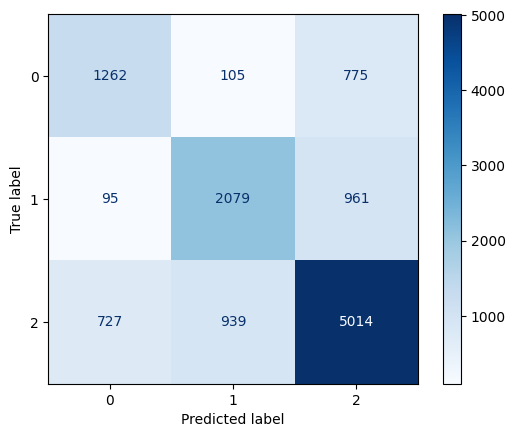

              precision    recall  f1-score   support

           0     0.6056    0.5892    0.5973      2142
           1     0.6657    0.6632    0.6644      3135
           2     0.7428    0.7506    0.7467      6680

    accuracy                         0.6988     11957
   macro avg     0.6714    0.6676    0.6695     11957
weighted avg     0.6980    0.6988    0.6984     11957

Accuracy: 0.70


In [92]:
from sklearn import metrics
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
# aplicar label encoder na target
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])

# todas as colunas menos o target
x = df.drop("Credit_Score", axis=1)

# aplicar label encoder nas categóricas
x['Occupation'] = label_encoder.fit_transform(x['Occupation'])
x['Credit_Mix'] = label_encoder.fit_transform(x['Credit_Mix'])
x['Payment_of_Min_Amount'] = label_encoder.fit_transform(x['Payment_of_Min_Amount'])
x['Payment_Behaviour'] = label_encoder.fit_transform(x['Payment_Behaviour'])
x['Age_Ajustado'] = label_encoder.fit_transform(x['Age_Ajustado'])
x['Annual_Income_Ajustado'] = label_encoder.fit_transform(x['Annual_Income_Ajustado'])
x['Monthly_Inhand_Salary_Ajustado'] = label_encoder.fit_transform(x['Monthly_Inhand_Salary_Ajustado'])
x['Credit_History_Age_Ajustado'] = label_encoder.fit_transform(x['Credit_History_Age_Ajustado'])
x['Amount_invested_monthly_Ajustado'] = label_encoder.fit_transform(x['Amount_invested_monthly_Ajustado'])
x['Monthly_Balance_Ajustado'] = label_encoder.fit_transform(x['Monthly_Balance_Ajustado'])
x['Credit_Utilization_Ratio_Ajustado'] = label_encoder.fit_transform(x['Credit_Utilization_Ratio_Ajustado'])
x['Total_EMI_per_month_Ajustado'] = label_encoder.fit_transform(x['Total_EMI_per_month_Ajustado'])

# apenas a target
y = df["Credit_Score"]

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de árvore de decisão
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
disp.plot(cmap="Blues")
plt.show()

# Avaliar o modelo
accuracy = classifier.score(x_test, y_test)
print(metrics.classification_report(y_test, y_pred, digits=4))
print(f"Accuracy: {accuracy:.2f}")
# tree.plot_tree(classifier)

# # Para imprimir na página HTML
# buffer = StringIO()
# plt.savefig(buffer, format="svg")
# print(buffer.getvalue())

In [93]:
df['Credit_Score'].value_counts()

Credit_Score
2    22436
1    10370
0     7049
Name: count, dtype: int64

In [94]:
df

,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Payment_Behaviour,Credit_Score,Annual_Income_Ajustado,Credit_Utilization_Ratio_Ajustado,Monthly_Inhand_Salary_Ajustado,Age_Ajustado,Credit_History_Age_Ajustado,Total_EMI_per_month_Ajustado,Amount_invested_monthly_Ajustado,Monthly_Balance_Ajustado
0,Scientist,3,4,3,4,5,4,6.27,4.0,Good,...,Low_spent_Small_value_payments,0,low,moderado,NaN,jovem_adulto,268,muito_baixo,very_low,low
1,Scientist,3,4,3,4,6,0,11.27,4.0,Good,...,High_spent_Medium_value_payments,0,low,baixo,low,jovem_adulto,269,muito_baixo,very_low,low
2,Scientist,3,4,3,4,3,8,11.27,4.0,Good,...,Low_spent_Small_value_payments,0,low,baixo,low,jovem_adulto,271,muito_baixo,very_low,low
3,Scientist,3,4,3,4,3,6,11.27,4.0,Good,...,High_spent_Medium_value_payments,2,low,baixo,low,jovem_adulto,0,muito_baixo,very_low,low
4,Teacher,2,4,6,1,7,1,7.42,2.0,Good,...,High_spent_Large_value_payments,0,lower_middle,moderado,lower_middle,jovem_adulto,320,muito_baixo,very_low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39850,Architect,10,8,29,5,33,25,23.31,9.0,Bad,...,Low_spent_Small_value_payments,1,low,moderado,low,jovem_adulto,69,muito_alto,very_low,low
39851,Architect,10,8,29,5,33,25,18.31,9.0,Bad,...,Low_spent_Small_value_payments,1,low,baixo,low,jovem_adulto,70,muito_baixo,very_low,low
39852,Architect,10,8,29,5,33,25,18.31,9.0,Bad,...,High_spent_Large_value_payments,2,low,moderado,low,jovem_adulto,75,muito_baixo,very_low,low
39853,Mechanic,4,6,7,2,23,0,11.50,3.0,Good,...,Low_spent_Medium_value_payments,2,lower_middle,baixo,lower_middle,jovem_adulto,376,muito_alto,very_low,low
